In [46]:
import os

from hta.trace_analysis import TraceAnalysis
from hta.trace_diff import LabeledTrace, DeviceType, TraceDiff
from hta.utils.utils import shorten_name, flatten_column_names

In [47]:
# Constants. Change these when switching traces.
# NOTE: `trace_dir` doesn't take Path vars.
PROFILE_DIR = f"{os.getcwd()}/profiles/profile_10906621/"

In [48]:
analyzer = TraceAnalysis(trace_dir = PROFILE_DIR + "multi_gpu_flex_model")

2023-10-30 16:46:18,168 - hta - trace.py:L389 - INFO - /fs01/home/mchoi/projects/flex_model/examples/perf_testing/profiles/profile_10906621/multi_gpu_flex_model
2023-10-30 16:46:18,169 - hta - trace_file.py:L94 - INFO - Rank to trace file map:
{0: '/fs01/home/mchoi/projects/flex_model/examples/perf_testing/profiles/profile_10906621/multi_gpu_flex_model/gpu187_4353.1698690621340.pt.trace.json', 1: '/fs01/home/mchoi/projects/flex_model/examples/perf_testing/profiles/profile_10906621/multi_gpu_flex_model/gpu187_4354.1698690623814.pt.trace.json'}
2023-10-30 16:46:18,170 - hta - trace.py:L535 - INFO - ranks=[0, 1]
2023-10-30 16:46:18,611 - hta - trace.py:L118 - INFO - Parsed /fs01/home/mchoi/projects/flex_model/examples/perf_testing/profiles/profile_10906621/multi_gpu_flex_model/gpu187_4353.1698690621340.pt.trace.json time = 0.41 seconds 
2023-10-30 16:46:18,888 - hta - trace.py:L118 - INFO - Parsed /fs01/home/mchoi/projects/flex_model/examples/perf_testing/profiles/profile_10906621/multi_g

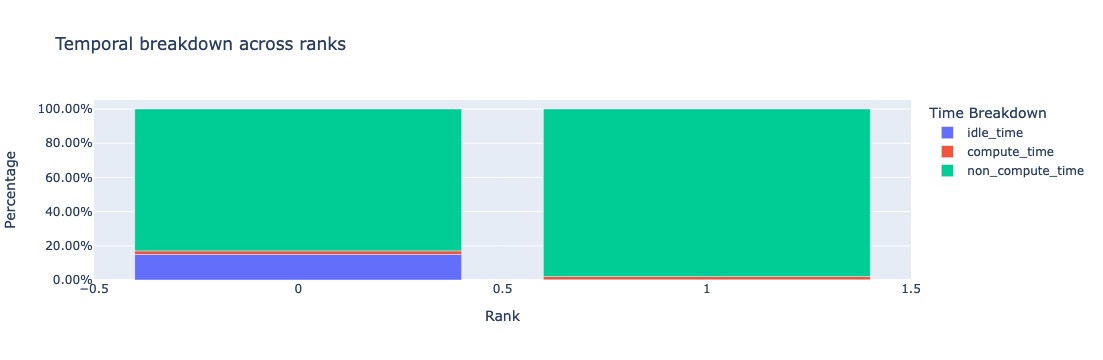

   rank  idle_time(us)  compute_time(us)  non_compute_time(us)  \
0     0         909458            125780               5049186   
1     1           7012            115718               5964181   

   kernel_time(us)  idle_time_pctg  compute_time_pctg  non_compute_time_pctg  
0          6084424           14.95               2.07                  82.99  
1          6086911            0.12               1.90                  97.98  


In [49]:
# Temporal breakdown
temporal_breakdown_df = analyzer.get_temporal_breakdown()
print(temporal_breakdown_df)

2023-10-30 16:46:21,400 - hta - breakdown_analysis.py:L433 - INFO - Processing stream 7
2023-10-30 16:46:21,410 - hta - breakdown_analysis.py:L433 - INFO - Processing stream 101
2023-10-30 16:46:21,419 - hta - breakdown_analysis.py:L433 - INFO - Processing stream 16
2023-10-30 16:46:21,426 - hta - breakdown_analysis.py:L433 - INFO - Processing stream 78


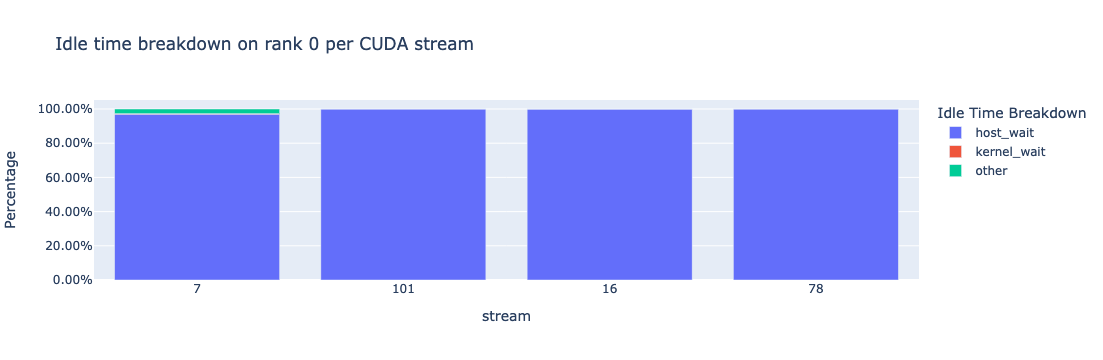

(   rank stream idle_category  idle_time  idle_time_ratio
0     0      7     host_wait  1017199.0             0.97
1     0      7   kernel_wait     2838.0             0.00
2     0      7         other    28877.0             0.03
3     0    101     host_wait  5991291.0             1.00
4     0    101         other        0.0             0.00
5     0     16     host_wait  6036066.0             1.00
6     0     16   kernel_wait      361.0             0.00
7     0     16         other        0.0             0.00
8     0     78     host_wait  5966615.0             1.00
9     0     78         other        0.0             0.00, None)


In [50]:
# Idle time breakdown
idle_time_df = analyzer.get_idle_time_breakdown()
print(idle_time_df)

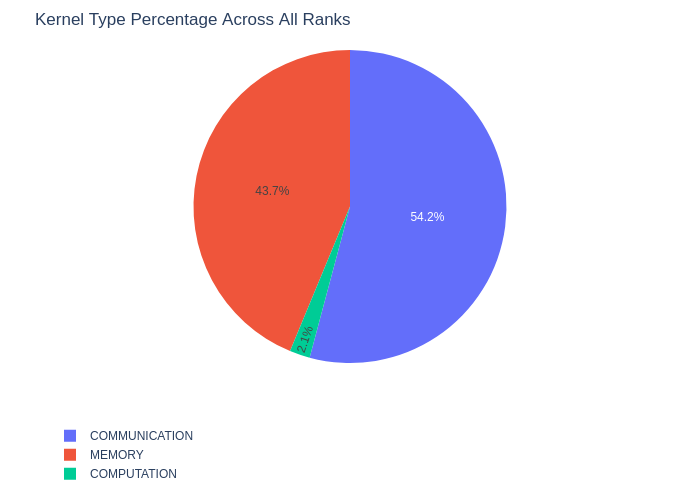

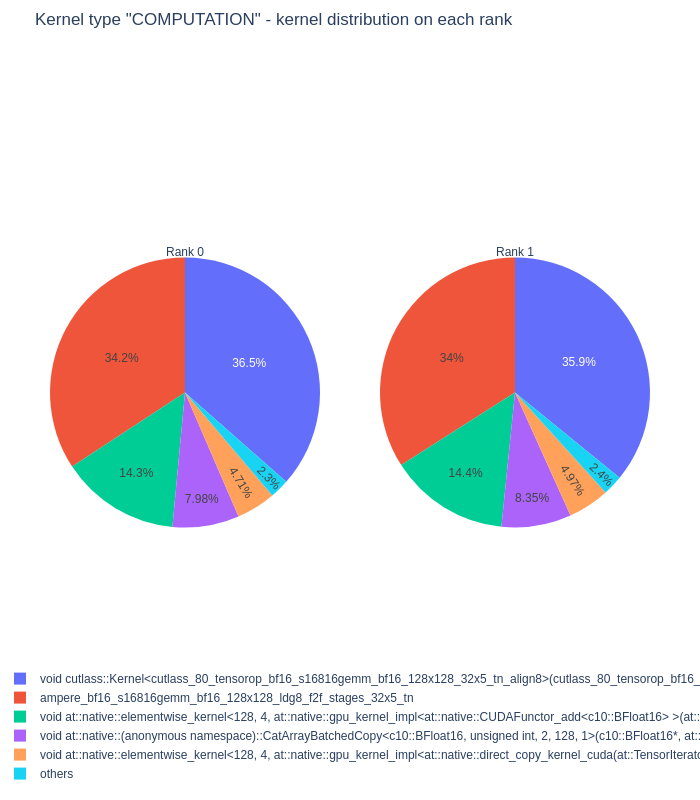

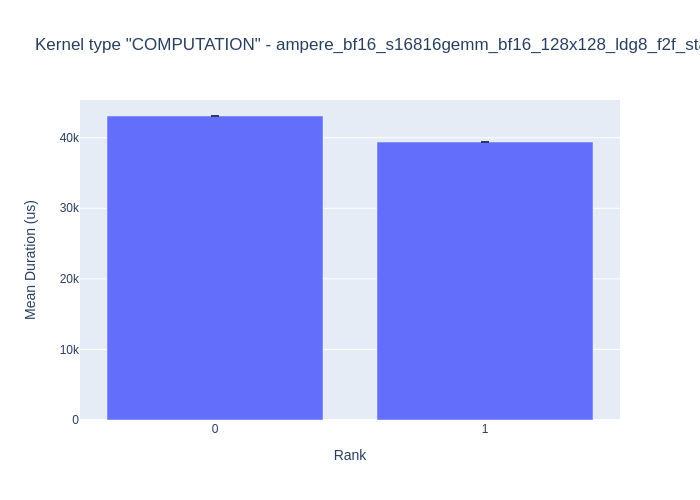

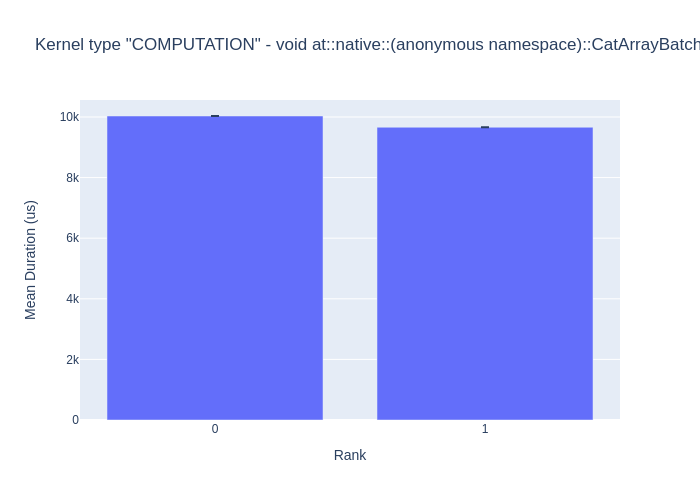

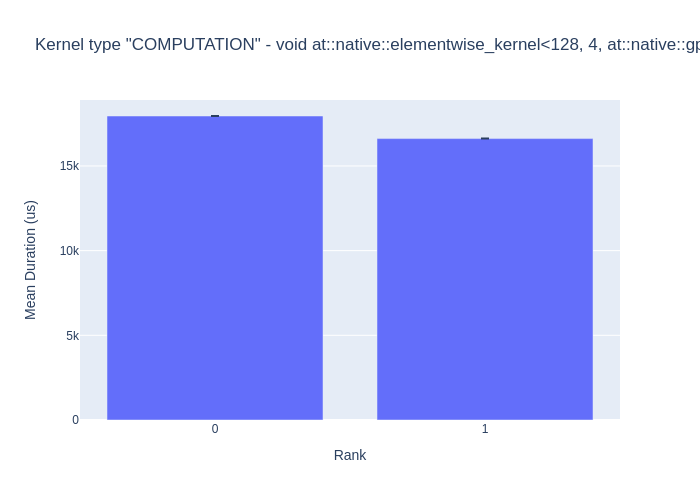

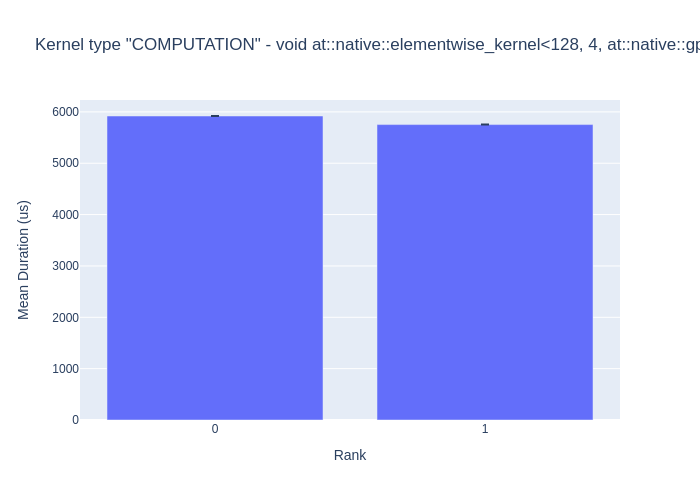

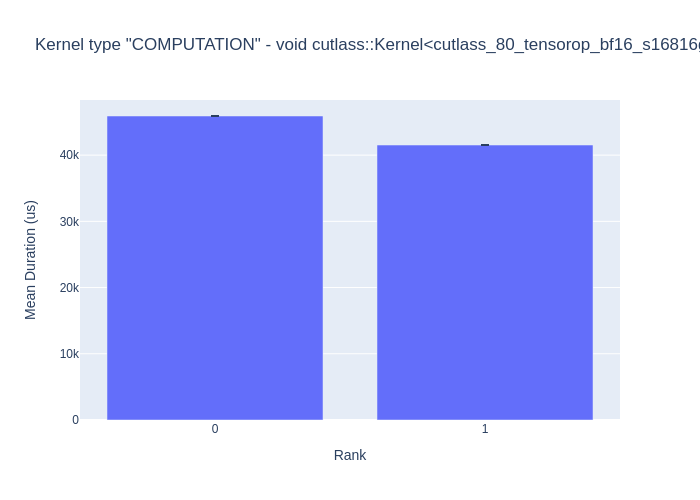

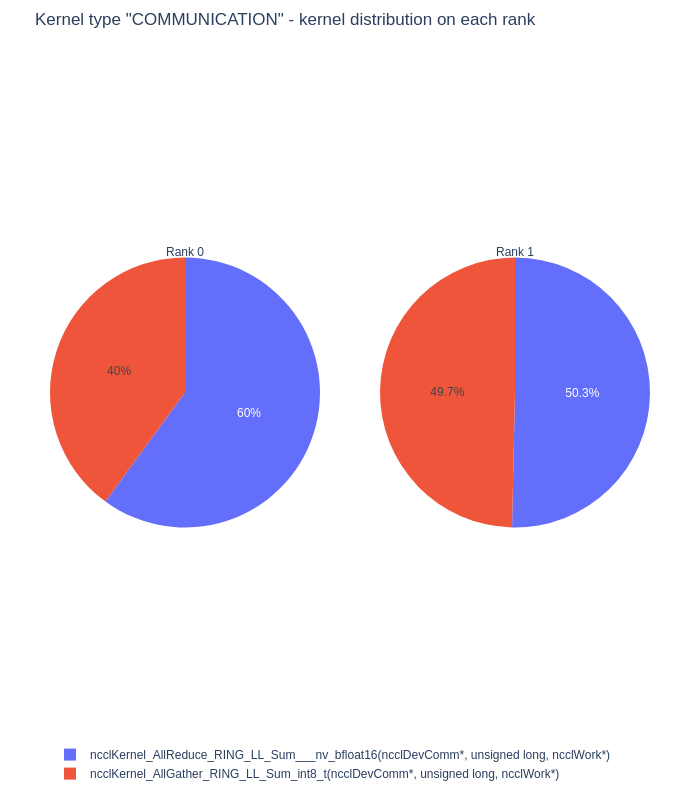

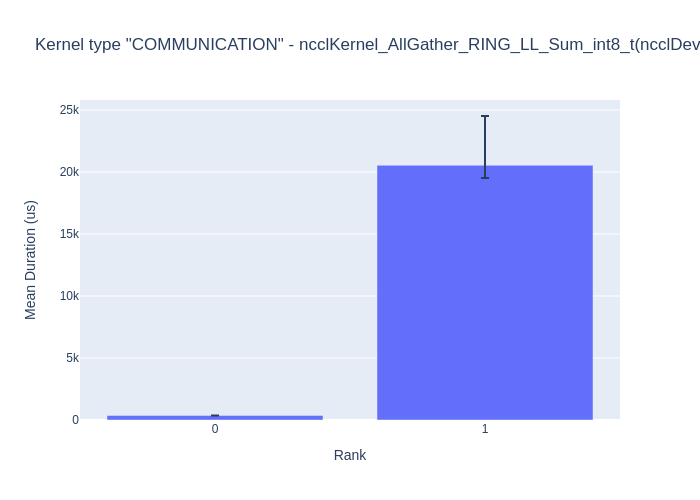

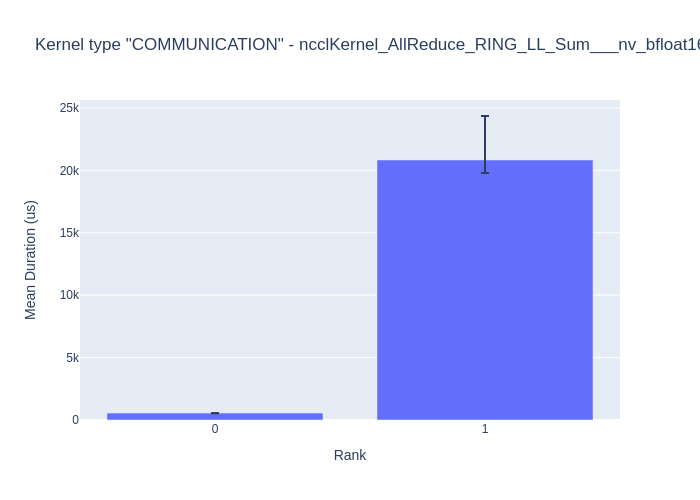

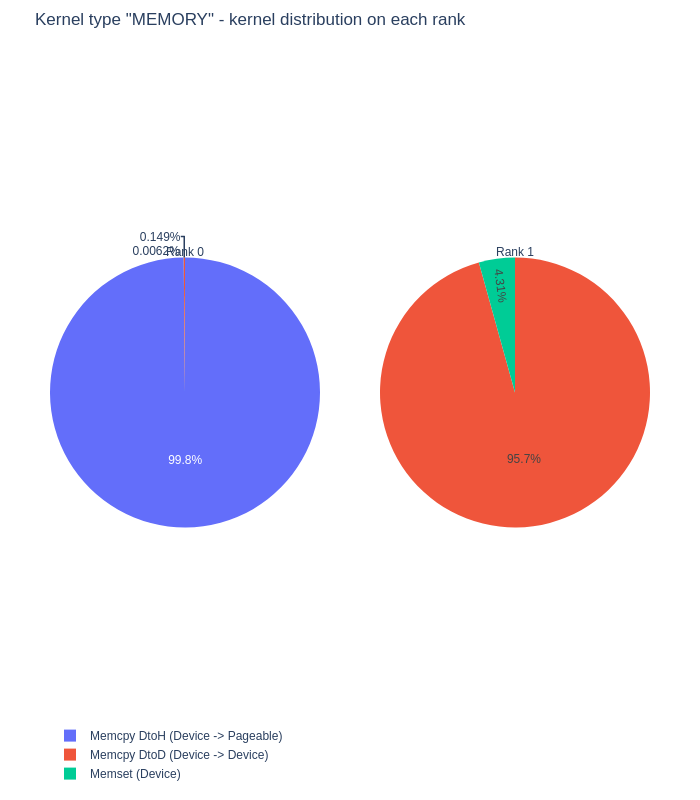

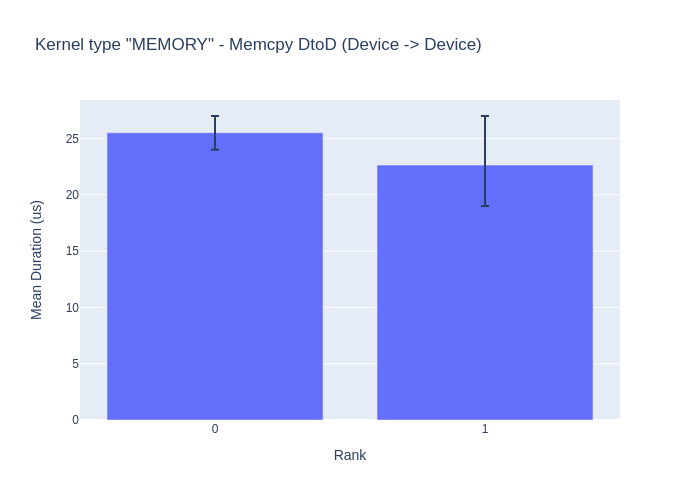

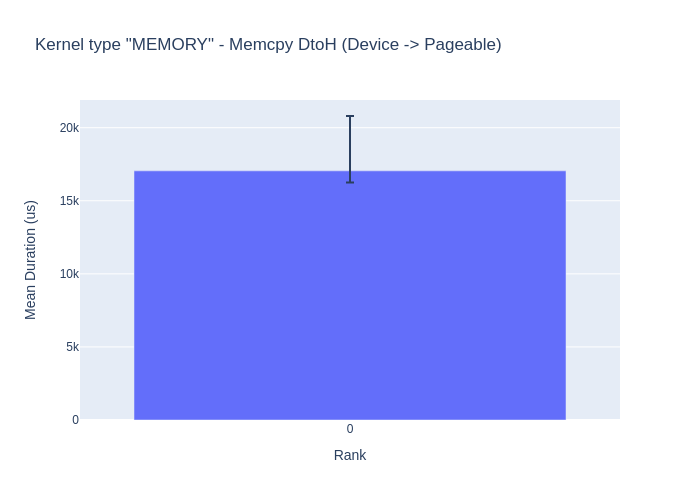

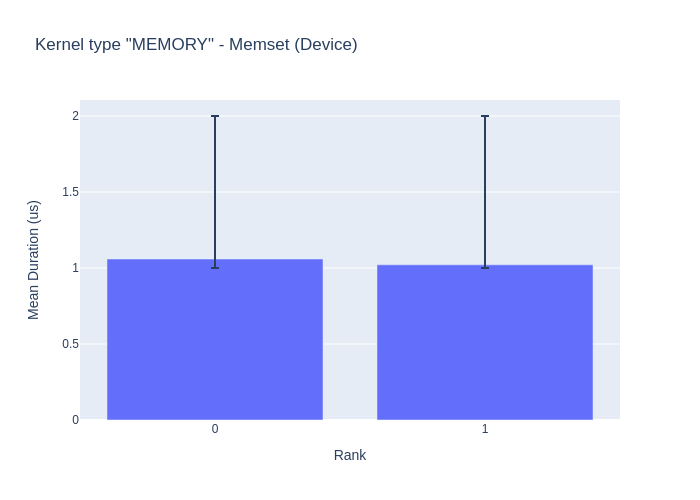

(     kernel_type      sum  percentage
0  COMMUNICATION  6089475        54.1
1         MEMORY  4923892        43.7
2    COMPUTATION   241498         2.1,                                                  name  sum (us)  max (us)  \
0   ncclKernel_AllGather_RING_LL_Sum_int8_t(ncclDe...     52798       371   
1   ncclKernel_AllGather_RING_LL_Sum_int8_t(ncclDe...   2957913     24514   
2   ncclKernel_AllReduce_RING_LL_Sum___nv_bfloat16...     79310       554   
3   ncclKernel_AllReduce_RING_LL_Sum___nv_bfloat16...   2999454     24352   
4   ampere_bf16_s16816gemm_bf16_128x128_ldg8_f2f_s...     43073     43073   
5   ampere_bf16_s16816gemm_bf16_128x128_ldg8_f2f_s...     39385     39385   
6                                              others      2897      2897   
7                                              others      2779      2779   
8   void at::native::(anonymous namespace)::CatArr...     10032     10032   
9   void at::native::(anonymous namespace)::CatArr...      9661      9661   

In [51]:
# Kernel breakdown
kernel_breakdown_df = analyzer.get_gpu_kernel_breakdown(num_kernels=5, image_renderer="png")
# NOTE: Plotly not rendering this so we just render PNGs.
print(kernel_breakdown_df)

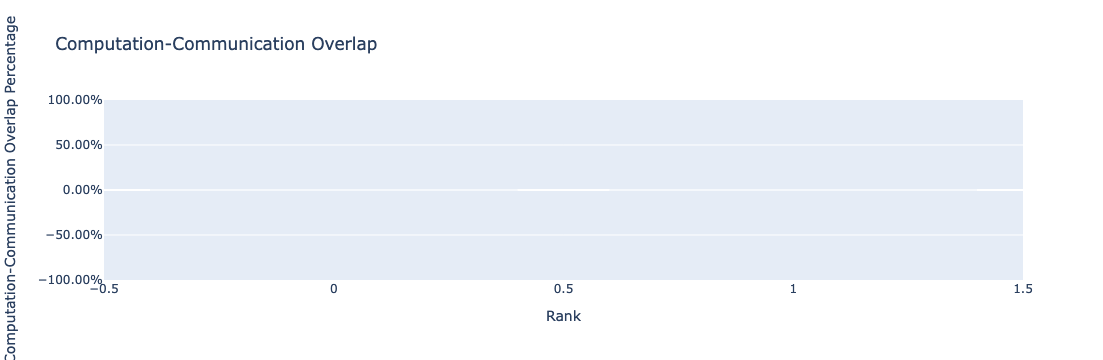

   rank  comp_comm_overlap_pctg
0     0                     0.0
1     1                     0.0


In [52]:
# Communication computation overlap
comm_comp_overlap_df = analyzer.get_comm_comp_overlap()
print(comm_comp_overlap_df)

In [53]:
# Memory bandwidth time series
memory_bw_series = analyzer.get_memory_bw_time_series()

2023-10-30 16:46:23,253 - hta - trace_counters.py:L266 - INFO - Please note that the time series only contains points when the value changes. Once a values is observed the time series stays constant until the next update.


In [54]:
# Memory bandwidth summary
memory_bw_summary = analyzer.get_memory_bw_summary()

2023-10-30 16:46:23,295 - hta - trace_counters.py:L266 - INFO - Please note that the time series only contains points when the value changes. Once a values is observed the time series stays constant until the next update.


In [55]:
# Queue length time series
ql_series = analyzer.get_queue_length_time_series()

2023-10-30 16:46:23,352 - hta - trace_counters.py:L129 - INFO - Please note that the time series only contains points when the value changes. Once a values is observed the time series stays constant until the next update.


In [56]:
# Queue length summary
ql_summary = analyzer.get_queue_length_summary()

2023-10-30 16:46:23,384 - hta - trace_counters.py:L129 - INFO - Please note that the time series only contains points when the value changes. Once a values is observed the time series stays constant until the next update.


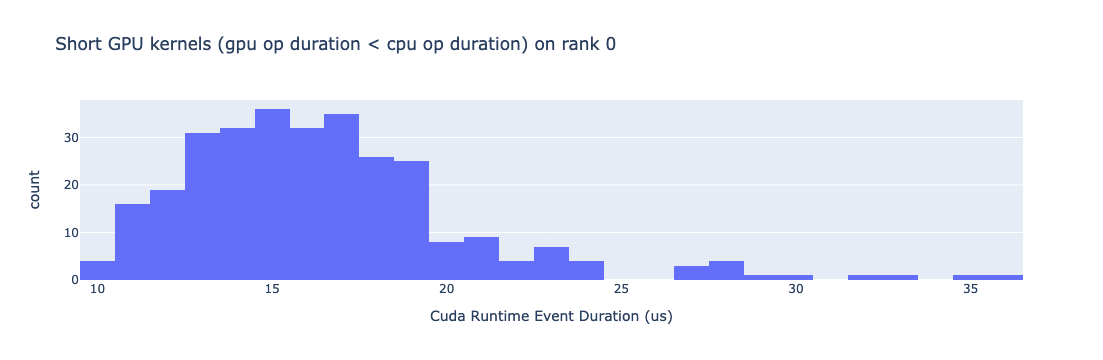

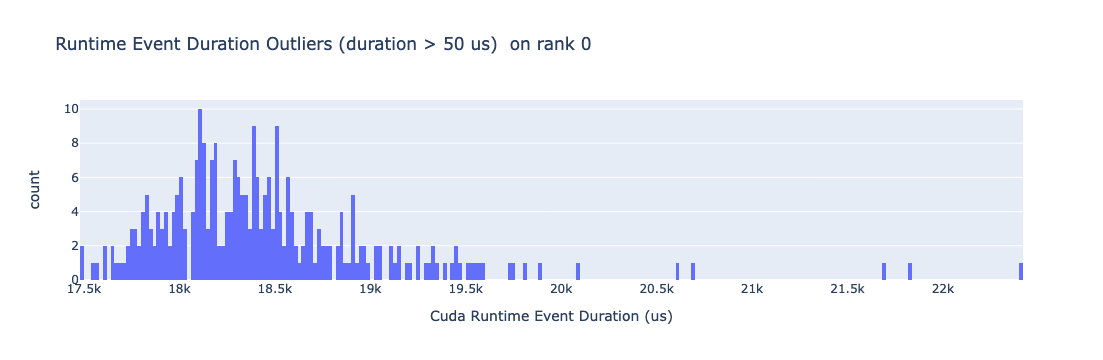

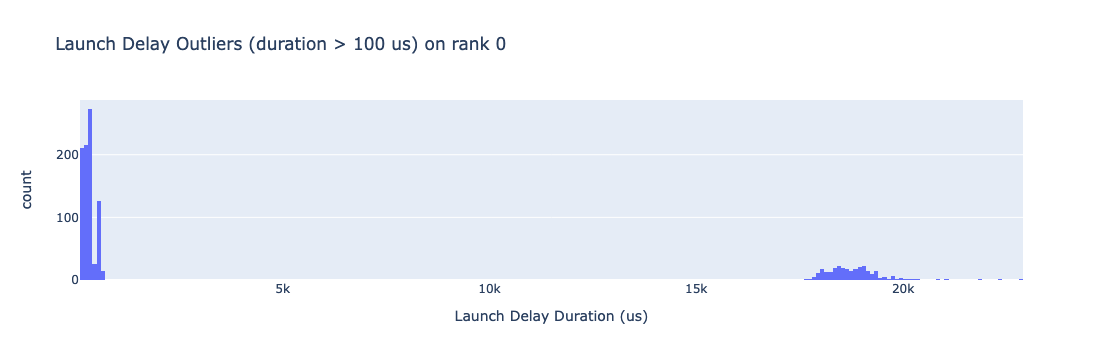

{0:       correlation  cpu_duration  gpu_duration  launch_delay
0          360803            13             1            30
1          360805            19           300            40
2          360813            15            43           272
3          360848            13           367            39
4          360855            19            25           366
...           ...           ...           ...           ...
2155       395639            16             1            35
2156       395641            11           319            22
2157       395659            12           550           152
2158       395695            12            81           542
2159       395706         19243         17700         19709

[2160 rows x 4 columns]}


In [57]:
# CUDA kernel launch statistics
cuda_kernel_launch_stats = analyzer.get_cuda_kernel_launch_stats()
print(cuda_kernel_launch_stats)

# Define trace diff function for generating visualizations

In [58]:
def generate_and_vis_diffs(test_t, control_t):
    print(f"available ranks for control_t: {control_t.ranks()}")
    print(f"available ranks for test_t: {test_t.ranks()}")
    print(f"available ranks for iterations: {control_t.iterations()}")
    print(f"available ranks for iterations: {test_t.iterations()}")

    # Generate tracediff dataframes for CPU and GPU ops.
    df_comp_cpu = TraceDiff.compare_traces(control_t, test_t, 0, 0, 5, 5, DeviceType.CPU)
    df_comp_gpu = TraceDiff.compare_traces(control_t, test_t, 0, 0, 5, 5, DeviceType.GPU)

    print("> Difference in operator counts")
    print(">> CPU ops")
    TraceDiff.visualize_counts_diff(df_comp_cpu.sort_values(by="diff_counts", ascending=False).head(10))
    print(">> GPU ops")
    TraceDiff.visualize_counts_diff(df_comp_gpu.sort_values(by="diff_counts", ascending=False).head(10))

    print("> Difference in duration")
    # Remove profiler step since it usually takes a lot of time.
    df_comp_cpu = df_comp_cpu.loc[~df_comp_cpu.index.str.startswith("ProfilerStep")]
    df_comp_gpu = df_comp_gpu.loc[~df_comp_gpu.index.str.startswith("ProfilerStep")]
    print(">> CPU ops")
    TraceDiff.visualize_duration_diff(df_comp_cpu.sort_values(by="diff_duration", ascending=False).head(10))
    print(">> GPU ops")
    TraceDiff.visualize_duration_diff(df_comp_gpu.sort_values(by="diff_duration", ascending=False).head(10))

## Trace Diffs (Control: multi-gpu, unity hooks | Test: multi-gpu, flex model)

2023-10-30 16:46:23,601 - hta - trace.py:L389 - INFO - /fs01/home/mchoi/projects/flex_model/examples/perf_testing/profiles/profile_10906621/multi_gpu_flex_model
2023-10-30 16:46:23,603 - hta - trace_file.py:L94 - INFO - Rank to trace file map:
{0: '/fs01/home/mchoi/projects/flex_model/examples/perf_testing/profiles/profile_10906621/multi_gpu_flex_model/gpu187_4353.1698690621340.pt.trace.json', 1: '/fs01/home/mchoi/projects/flex_model/examples/perf_testing/profiles/profile_10906621/multi_gpu_flex_model/gpu187_4354.1698690623814.pt.trace.json'}
2023-10-30 16:46:23,605 - hta - trace.py:L535 - INFO - ranks=[0, 1]
2023-10-30 16:46:23,964 - hta - trace.py:L118 - INFO - Parsed /fs01/home/mchoi/projects/flex_model/examples/perf_testing/profiles/profile_10906621/multi_gpu_flex_model/gpu187_4353.1698690621340.pt.trace.json time = 0.34 seconds 
2023-10-30 16:46:24,363 - hta - trace.py:L118 - INFO - Parsed /fs01/home/mchoi/projects/flex_model/examples/perf_testing/profiles/profile_10906621/multi_g

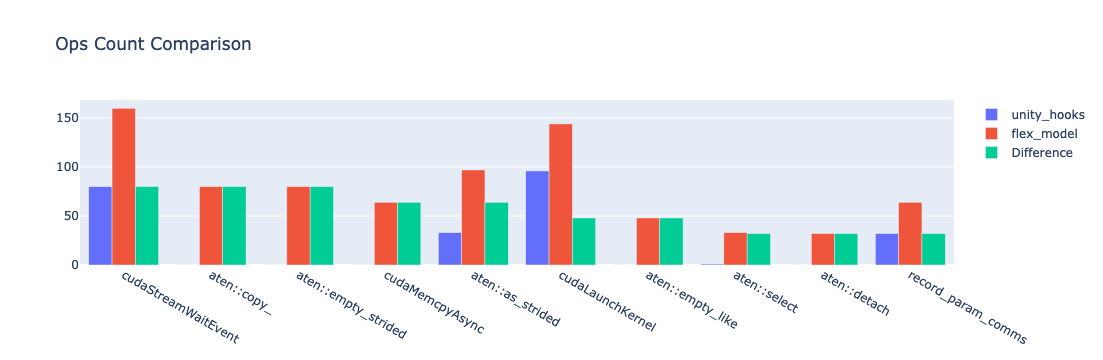

>> GPU ops


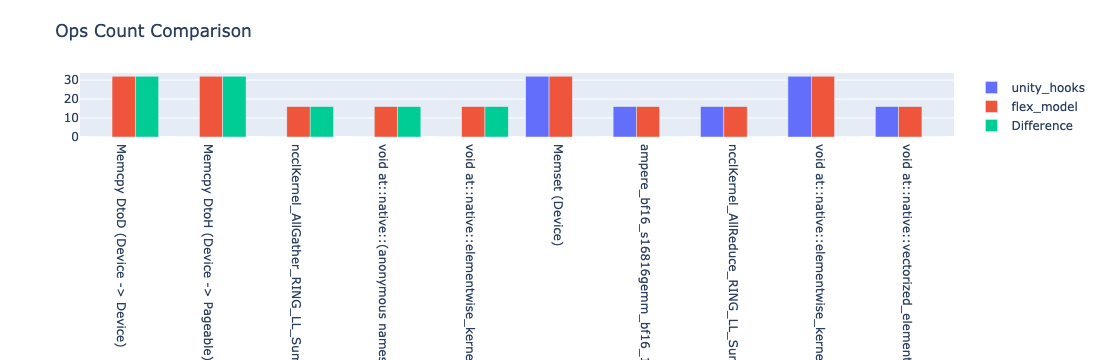

> Difference in duration
>> CPU ops


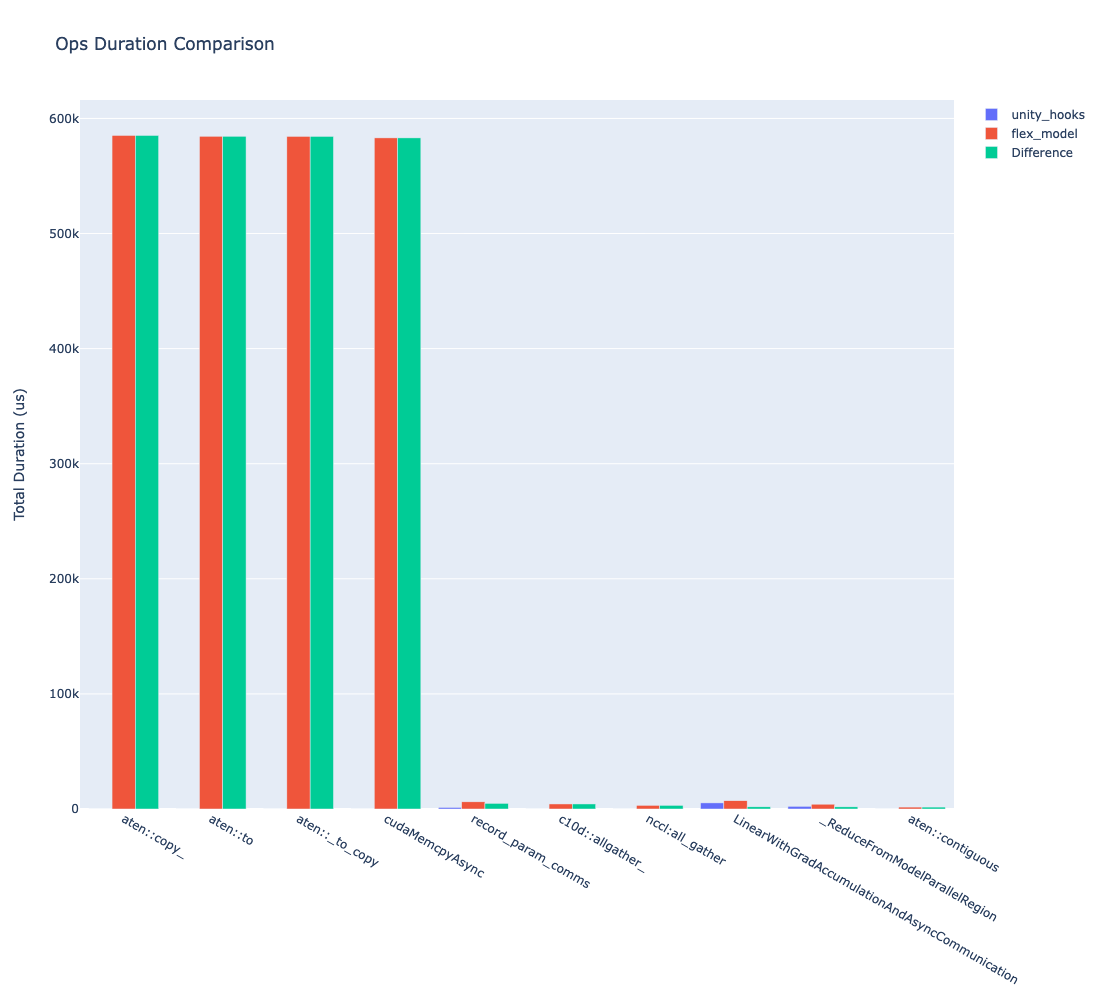

>> GPU ops


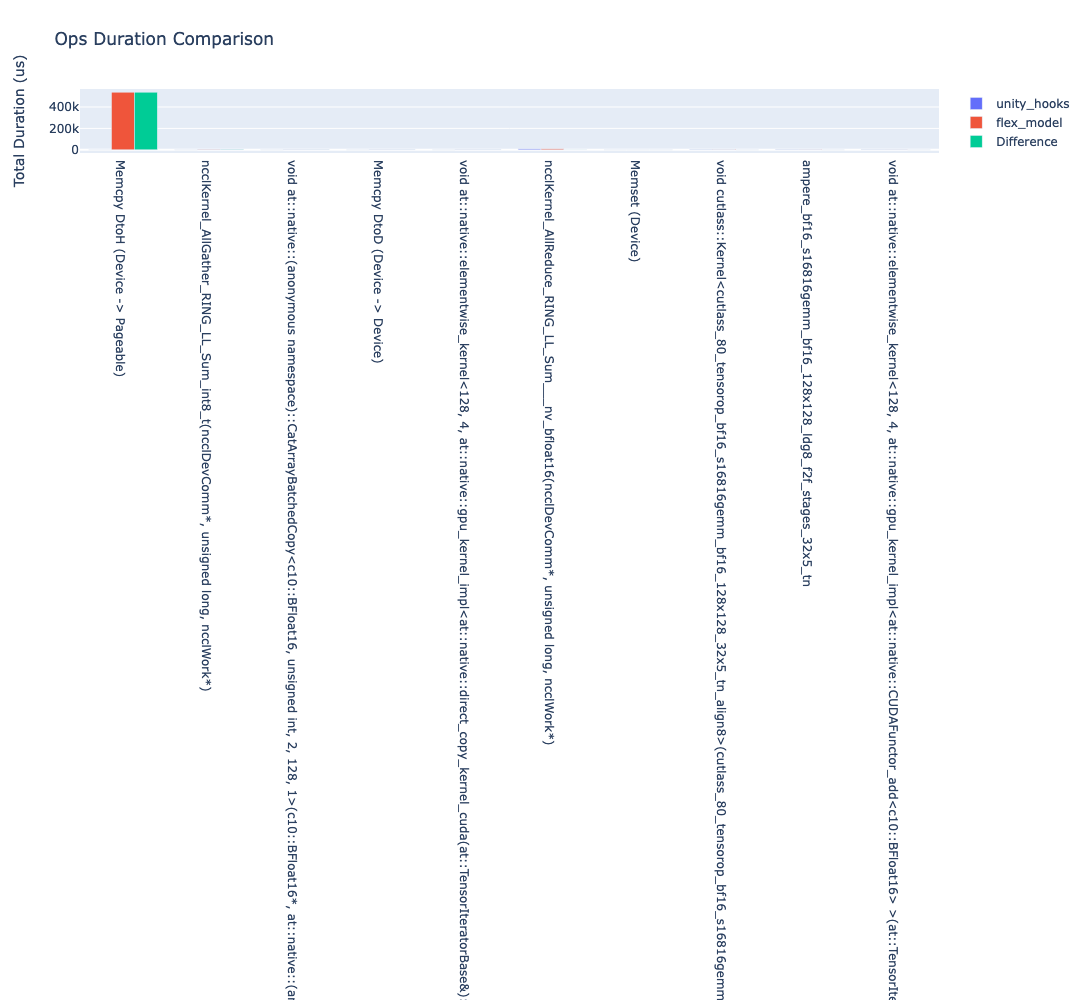

In [59]:
test_t = LabeledTrace(label="flex_model", trace_dir = PROFILE_DIR + "multi_gpu_flex_model")
control_t = LabeledTrace(label="unity_hooks", trace_dir = PROFILE_DIR + "multi_gpu_unity_hooks")
generate_and_vis_diffs(test_t, control_t)

## Trace Diffs (Control: multi-gpu, cpu hooks w/ gather/scatter | Test: multi-gpu, flex model)

2023-10-30 16:47:04,945 - hta - trace.py:L389 - INFO - /fs01/home/mchoi/projects/flex_model/examples/perf_testing/profiles/profile_10906621/multi_gpu_flex_model
2023-10-30 16:47:04,955 - hta - trace_file.py:L94 - INFO - Rank to trace file map:
{0: '/fs01/home/mchoi/projects/flex_model/examples/perf_testing/profiles/profile_10906621/multi_gpu_flex_model/gpu187_4353.1698690621340.pt.trace.json', 1: '/fs01/home/mchoi/projects/flex_model/examples/perf_testing/profiles/profile_10906621/multi_gpu_flex_model/gpu187_4354.1698690623814.pt.trace.json'}
2023-10-30 16:47:04,957 - hta - trace.py:L535 - INFO - ranks=[0, 1]
2023-10-30 16:47:05,319 - hta - trace.py:L118 - INFO - Parsed /fs01/home/mchoi/projects/flex_model/examples/perf_testing/profiles/profile_10906621/multi_gpu_flex_model/gpu187_4353.1698690621340.pt.trace.json time = 0.33 seconds 
2023-10-30 16:47:05,734 - hta - trace.py:L118 - INFO - Parsed /fs01/home/mchoi/projects/flex_model/examples/perf_testing/profiles/profile_10906621/multi_g

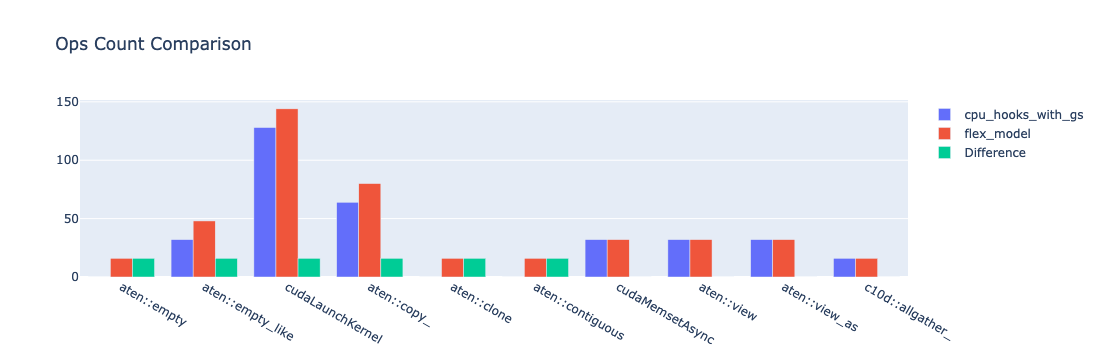

>> GPU ops


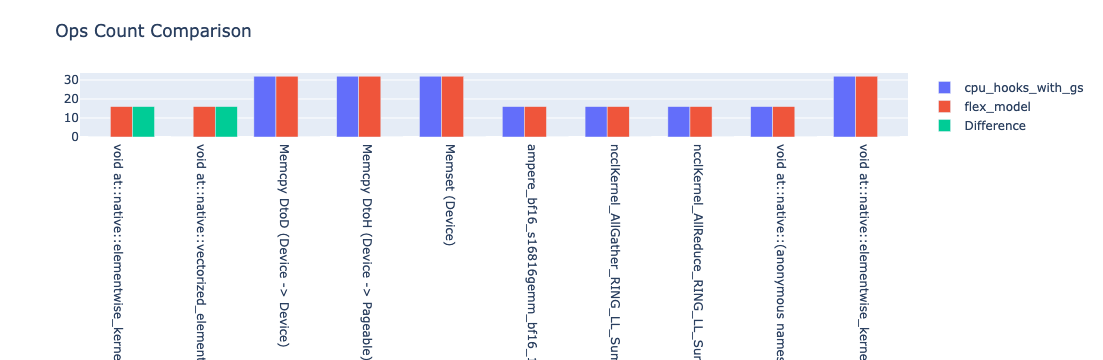

> Difference in duration
>> CPU ops


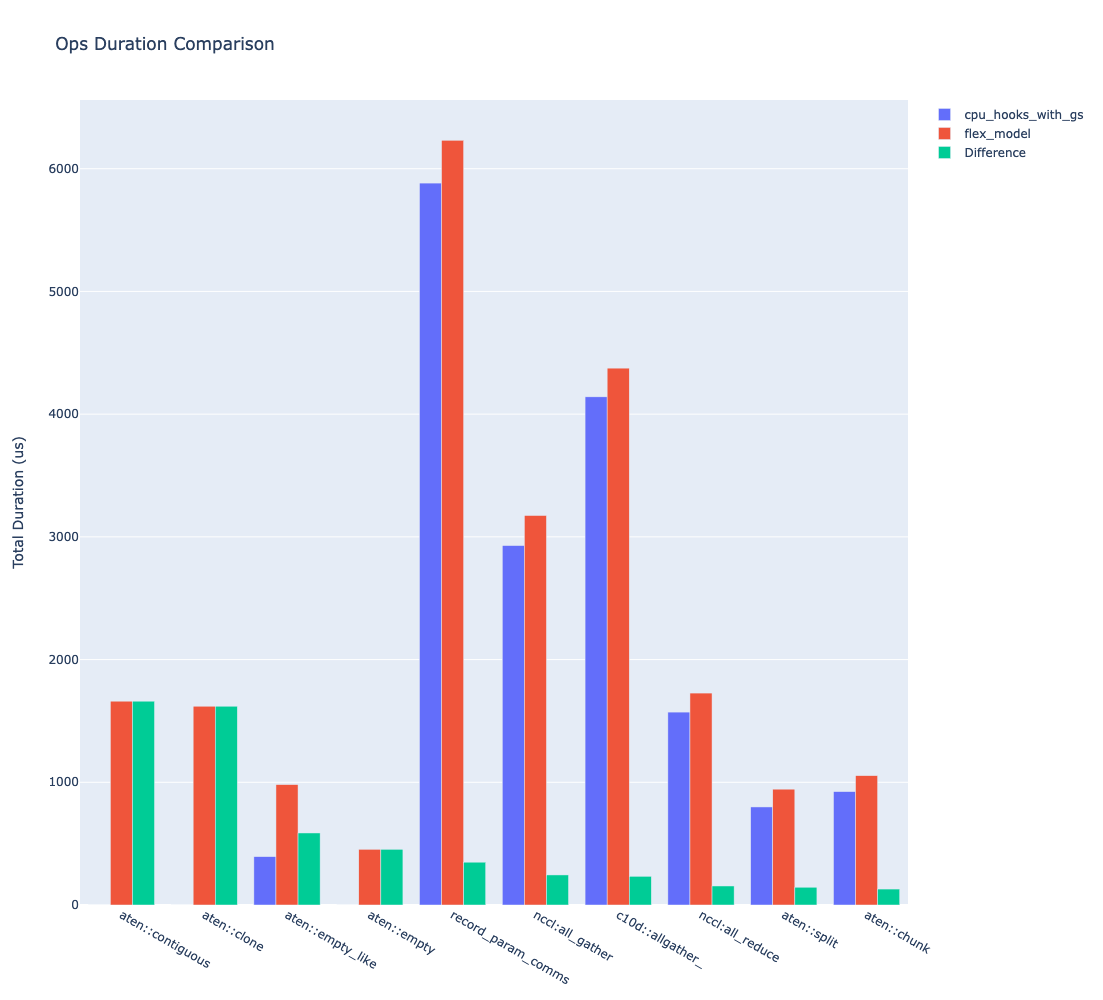

>> GPU ops


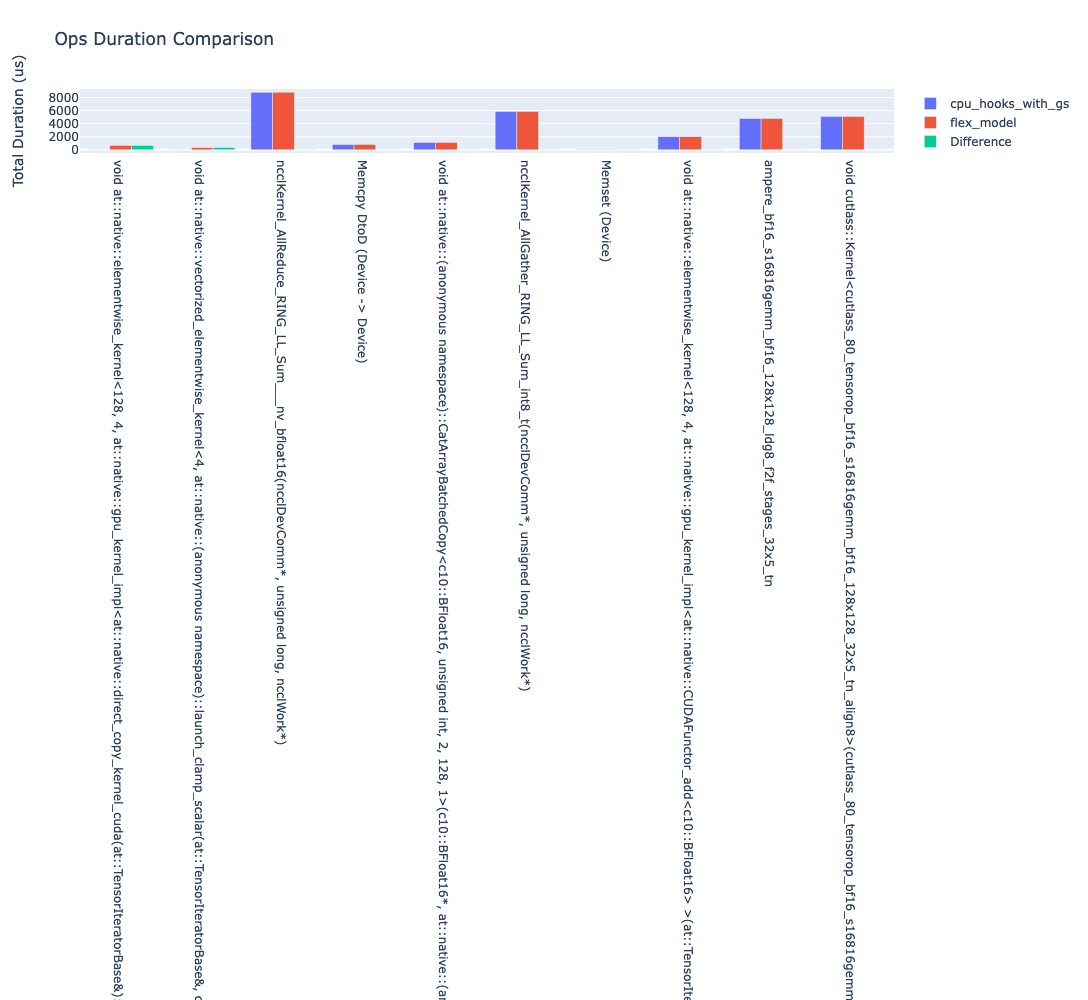

In [61]:
test_t = LabeledTrace(label="flex_model", trace_dir = PROFILE_DIR + "multi_gpu_flex_model")
control_t = LabeledTrace(label="cpu_hooks_with_gs", trace_dir = PROFILE_DIR + "multi_gpu_cpu_hooks_with_gather_scatter")
generate_and_vis_diffs(test_t, control_t)